In [4]:
from tensorflow.python.client import device_lib
import tensorflow as tf

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.7.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import glob
import os

from tqdm import tqdm
import pandas as pd
import numpy as np

import cv2

tqdm.pandas()

# ROOT = "/content/drive/MyDrive/research/data"
# pd.read_csv(os.path.join(ROOT, 'train_meta.csv'))

ROOT = "/mnt/d/tmp"

def read_img(p):
  """
    read image and resize it to square shape (filling empty zeroes)
  """
  im = cv2.imread(p, 0)
  h, w = im.shape
  s = max(h, w)

  im_new = np.zeros((s,s), np.uint8)
  x_center, y_center = (s - w)//2, (s - h)// 2

  im_new[y_center: (h + y_center), x_center: (w + x_center)] = im

  return im_new

# MASK DATA import
MASKED_DIR = "AFDB_face_dataset"

mask_sub = glob.glob(os.path.join(ROOT, MASKED_DIR, "*", "*"))

df_mask = pd.DataFrame(np.asarray(mask_sub)[:100], columns=['name'])
df_mask['label'] = df_mask.name.progress_apply(os.path.dirname).progress_apply(os.path.basename)
df_mask['image'] = df_mask.name.progress_apply(read_img)
df_mask['mask'] = 1

del mask_sub

# NON-MASK DATA import
NON_MASK_DIR = "AFDB_masked_face_dataset"

nmask_sub = glob.glob(os.path.join(ROOT, NON_MASK_DIR, "*", "*"))

df_nmask = pd.DataFrame(np.asarray(nmask_sub)[:100], columns=['name'])
df_nmask['label'] = df_nmask.name.progress_apply(os.path.dirname).progress_apply(os.path.basename)
df_nmask['image'] = df_nmask.name.progress_apply(read_img)
df_nmask['mask'] = 0

del nmask_sub

df = pd.concat([df_mask, df_nmask])
 
del df_mask
del df_nmask

100%|██████████| 100/100 [00:00<00:00, 198.68it/s]


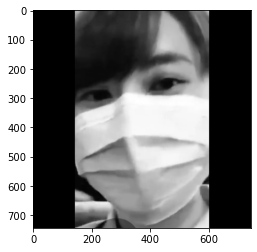

In [8]:
from matplotlib import pyplot as plt

plt.imshow(df.iloc[110].image, cmap='gray')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50

RESNET_WEIGHT_PATH = '/mnt/d/tmp/pretrained/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Hyper-params
RESNET50_POOLING_AVERAGE = 'avg'

model = Sequential()
model.add(
    ResNet50(
        include_top=False,
        pooling=RESNET50_POOLING_AVERAGE,
        weights=RESNET_WEIGHT_PATH)
)

model.layers[0].trainable = False

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.